In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [57]:
df=pd.read_csv('hr_data.csv')
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [58]:
df.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [59]:
df.columns

Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')

In [60]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [61]:
df.dtypes

employee_id               int64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion_last_5years     int64
department               object
salary                   object
dtype: object

In [62]:
cat=df.select_dtypes(exclude=np.number)
list(cat)

['department', 'salary']

In [63]:
df1=pd.read_excel('employee_satisfaction_evaluation.xlsx')

In [64]:
df1.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [65]:
df.shape

(14999, 9)

In [66]:
df1.shape

(14999, 3)

In [67]:
df1.isnull().sum()

EMPLOYEE #             0
satisfaction_level    27
last_evaluation       27
dtype: int64

In [68]:
df1.fillna(df1.mean(),inplace=True)

In [69]:
df1.isnull().sum()

EMPLOYEE #            0
satisfaction_level    0
last_evaluation       0
dtype: int64

In [70]:
df1[df1.isnull().any(axis=1)]

,EMPLOYEE #,satisfaction_level,last_evaluation


In [71]:
df[df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


In [72]:
main_df=df.set_index('employee_id').join(df1.set_index('EMPLOYEE #'))

In [73]:
main_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [74]:
main_df=main_df.reset_index()

In [75]:
main_df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [76]:
main_df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [77]:
main_df.groupby('department').sum()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,,
IT,56344929,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,32948168,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,34474313,2934,154292,2702,96,204,14,446.68283,550.706125
hr,31664725,2701,146828,2480,89,215,15,442.53566,524.006125
management,33597098,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,40715777,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,44016858,3434,180369,3135,132,198,0,559.19566,644.662250
sales,192072490,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,97874011,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [78]:
main_df.drop('employee_id',1,inplace=True)

In [79]:
main_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [80]:
corr=main_df.corr()

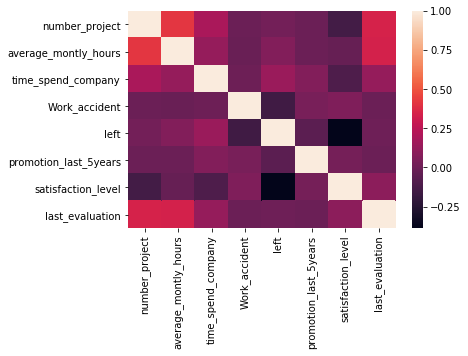

In [81]:
import seaborn as sns
sns.heatmap(corr)


In [82]:
main_df=pd.get_dummies(main_df,columns=list(cat),drop_first=True)
main_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [83]:
main_df.columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [98]:
len(main_df[main_df['left']==1])

3571

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [119]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 78.98%
[[3201  248]
 [ 698  353]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3449
           1       0.59      0.34      0.43      1051

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.77      0.79      0.77      4500



In [121]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 98.49%
[[3432   17]
 [  51 1000]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3449
           1       0.98      0.95      0.97      1051

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [122]:
col=main_df.drop('left',1).columns
col

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [131]:
feature_importance=pd.DataFrame(model.feature_importances_,index=col,
                                columns=['importance']).sort_values('importance',ascending=False)

In [132]:
feature_importance

,importance
satisfaction_level,0.356983
time_spend_company,0.195875
number_project,0.164774
average_montly_hours,0.133097
last_evaluation,0.109368
salary_low,0.008834
Work_accident,0.007001
department_technical,0.003824
department_sales,0.003258
salary_medium,0.003059


TypeError: Expected sequence or array-like, got <class 'builtin_function_or_method'>